# Homework
 Write a function that divides an image into non-overlapping blocks (e.g., 8x8 or 16x16) 
 and applies a simple pixel manipulation technique such as averaging or quantization to each block. 
 You should reduce the color precision within each block while preserving 
 structural information (for example, reducing the number of unique colors per block).

#### Please follow the following guidelines:
 - Use python code.
 - Do not attach any files, submit only the code that takes the input image indicated below and produces an output image saved as "img.jpg".
 - If possible, use only opencv-python, scikit-image and numpy.
 - Make sure your code is properly indented and commented, and executable with Python >= 3.8.
 - Use the following code to load the image as a numpy array:

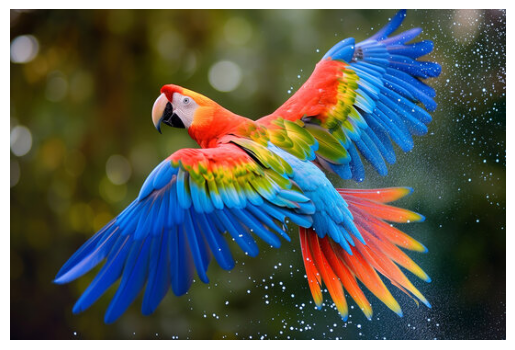

In [17]:
from skimage import io
import cv2
import matplotlib.pyplot as plt   # just for representation purposes

# Reading image
img = io.imread('https://t4.ftcdn.net/jpg/07/18/12/87/360_F_718128776_nJReWqPkf5qF4Y5na8ZqGWAbdCJTpczZ.jpg')

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [18]:
# Getting image dimensions
height, width, _ = img.shape


print(height)
print(width)

360
540


In [19]:
# Now lets choose the subdivision size of the image

m, n = 8, 8 

height_subdivision = height // m
width_subdivision = width // n

print(height_subdivision)
print(width_subdivision)

45
67


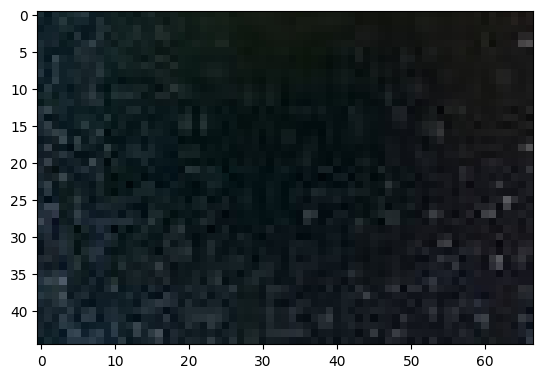

In [20]:
subdivisions = []

for i in range(m):
    for j in range(n):
        y1, y2 = i * height_subdivision, (i + 1) * height_subdivision
        x1, x2 = j * width_subdivision, (j + 1) * width_subdivision
        block = img[y1:y2, x1:x2]
        subdivisions.append(block)
        plt.imshow(block)

In [22]:
### Quantization

quantization_step = 10 # supposedly there is 64 levels of quantization

# Applying the quantization to the blocks
quantized_blocks = []
for block in subdivisions:
    quantized_block = (block // quantization_step) * quantization_step  # Quantization
    quantized_blocks.append(quantized_block)


### Averaging blur

kernel_size = 5  # Size of the averaging kernel

# Apply averaging blur to each block
blurred_blocks = []
for block in subdivisions:
    blurred_block = cv2.blur(block, (kernel_size, kernel_size))  # Averaging blur
    blurred_blocks.append(blurred_block)

### Combined Steps for both

processed_blocks = []
for block in subdivisions:
    # Step 1: Apply quantization
    quantized_block = (block // quantization_step) * quantization_step
    
    # Step 2: Apply averaging blur
    processed_block = cv2.blur(quantized_block, (kernel_size, kernel_size))
    
    # Store the processed block
    processed_blocks.append(processed_block)


In [24]:
# Create a new blank image to hold the processed result
processed_img = img.copy()

# Reinsert each processed block back into the image
index = 0
for i in range(m):
    for j in range(n):
        y1, y2 = i * height, (i + 1) * height
        x1, x2 = j * width, (j + 1) * width

        # Replace the region with the processed block
        processed_img[y1:y2, x1:x2] = processed_blocks[index]
        index += 1

# Display the processed image
plt.imshow(processed_img)
plt.show()


ValueError: could not broadcast input array from shape (45,67,3) into shape (360,540,3)

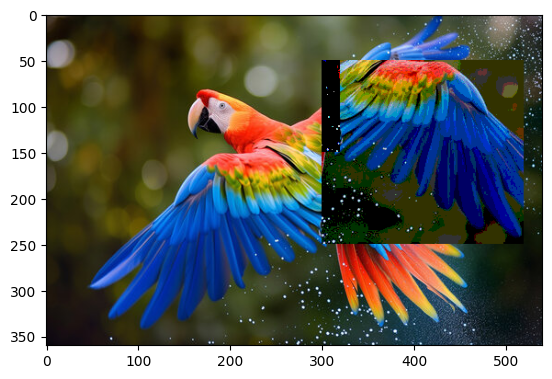

In [40]:
# Example coordinates (you need to adjust based on visual inspection)
y1, y2 = 150, 350  # Vertical range
x1, x2 = 100, 320  # Horizontal range

# Extract wing region
wing = img[y1:y2, x1:x2]

# Display the wing region
flipped_img = cv2.flip(wing, 1) 

Apply averaging to the flipped image
kernel_size = 9  # Size of the averaging kernel
flipped_img = cv2.blur(flipped_img, (kernel_size, kernel_size))  # Averaging filter

# Apply quantization to the flipped image
quantization_step = 50  # Define the quantization step (e.g., 64 levels)
flipped_img = (flipped_img // quantization_step) * quantization_step  # Quantize pixel values


# Place the reversed wing back into the image
img[50:250, 300:520] = flipped_img

# Display the wing region
plt.imshow(img)
plt.show()

In [ ]:
# import cv2
# import matplotlib.pyplot as plt

# # Load the image
# img = cv2.imread('path_to_image')  # Replace with your file path
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# # Coordinates for the region of interest (replace with your coordinates)
# y1, y2 = 150, 350  # Vertical range
# x1, x2 = 250, 450  # Horizontal range

# # Extract the region of interest (ROI)
# roi = img[y1:y2, x1:x2]

# # Flip the ROI along the vertical axis
# flipped_roi = cv2.flip(roi, 1)

# # Replace the original region with the flipped version
# img[y1:y2, x1:x2] = flipped_roi

# # Display the modified image
# plt.imshow(img)
# plt.show()
